In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from ydata_profiling import ProfileReport
import sweetviz as sv
import plotly.express as px
import plotly.graph_objects as go
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [2]:
df = pd.read_csv('final_data.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [3]:
# profile = ProfileReport(df, title="Pandas Profiling Report")
# profile.to_notebook_iframe()

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [4]:
df

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [5]:
# Sources Transfermarkt: https://www.transfermarkt.com/

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [6]:
# The dataset from 2021-2022 and 2022-2023 and this is the last version of it 

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [7]:
# The dataset is completely consistene every columns have the same valuse type 

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [8]:
df.drop(columns='player' , inplace = True)
df.drop(columns='winger' , inplace = True)
df.drop(columns='position_encoded' , inplace = True)
df.drop(columns='name' , inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 10754 non-null  object 
 1   position             10754 non-null  object 
 2   height               10754 non-null  float64
 3   age                  10754 non-null  float64
 4   appearance           10754 non-null  int64  
 5   goals                10754 non-null  float64
 6   assists              10754 non-null  float64
 7   yellow cards         10754 non-null  float64
 8   second yellow cards  10754 non-null  float64
 9   red cards            10754 non-null  float64
 10  goals conceded       10754 non-null  float64
 11  clean sheets         10754 non-null  float64
 12  minutes played       10754 non-null  int64  
 13  days_injured         10754 non-null  int64  
 14  games_injured        10754 non-null  int64  
 15  award                10754 non-null 

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [10]:
df[df.duplicated()]

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value


In [11]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [12]:
df.isnull().sum()

team                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
dtype: int64

In [13]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [14]:
df.dtypes

team                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
dtype: object

In [15]:
# go to clean them 

In [16]:
# check outliers 

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

In [17]:
## Theres no null values 

In [18]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [19]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


In [20]:
Cate_values = ['team' , 'position']
Num_values = ['height' , 'age' , 'appearance' , 'goals' , 'assists' , 'yellow cards' , 'second yellow cards' , 'red cards' , 'goals conceded' , 'clean sheets' , 'minutes played' , 'days_injured' , 'games_injured' , 'award' , 'current_value' , 'highest_value']

In [21]:
# advert_report = sv.analyze(df)
# advert_report.show_html('Advertising.html')

In [22]:
# df = df[(df['second yellow cards']<=0.2) & (df['second yellow cards']>=0.0) & (df['yellow cards']<=0.6) & (df['yellow cards']>=0.0) & (df['assists']<=0.55) & (df['assists']>=0.0) & (df['goals']<=0.7) & (df['goals']>=0.0) & (df['red cards']<=0.125) & (df['red cards']>=0.0) & (df['goals conceded']<=3) & (df['goals conceded']>=0.0) & (df['clean sheets']<= 0.6) & (df['clean sheets']>=0.0) & (df['games_injured']<= 100) & (df['games_injured']>=0.0) &(df['days_injured']<= 800) & (df['days_injured']>=0.0) & (df['minutes played']<=8000) & (df['minutes played']>=0.0) & (df['award']<= 14) & (df['award']>=0.0) & (df['current_value']<=20000000) & (df['current_value']>=10000) &(df['age']<=37) & (df['age']>= 18) & (df['highest_value']<35000000) & (df['highest_value'] >0)]
# df.shape

In [23]:
df.shape

(10754, 18)

In [24]:
df = df[df['minutes played'] < 2470]

In [25]:
df.to_csv("Lower player.csv")

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

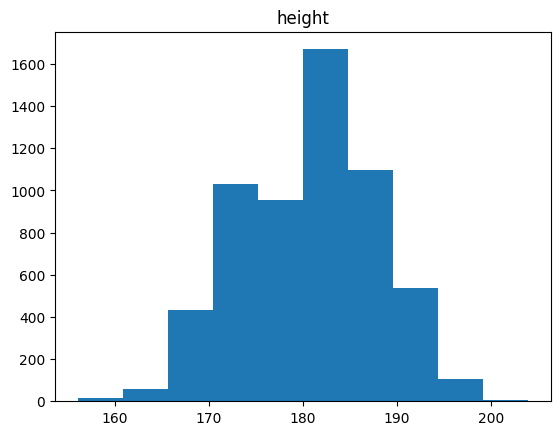

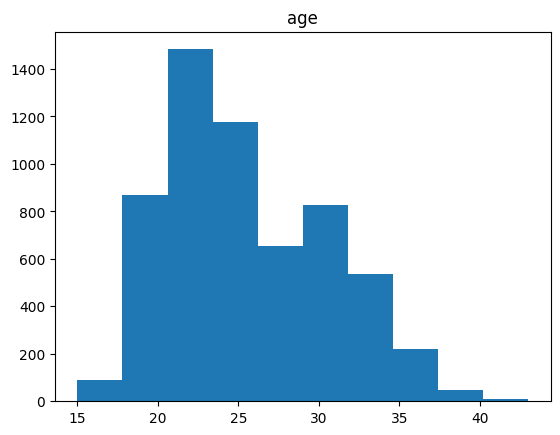

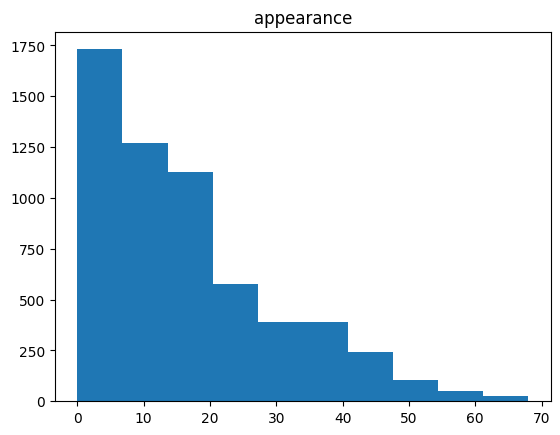

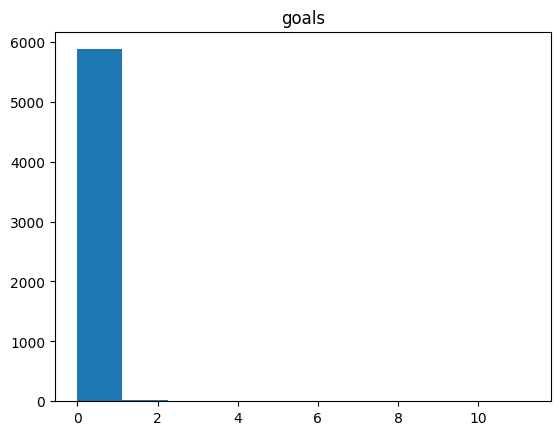

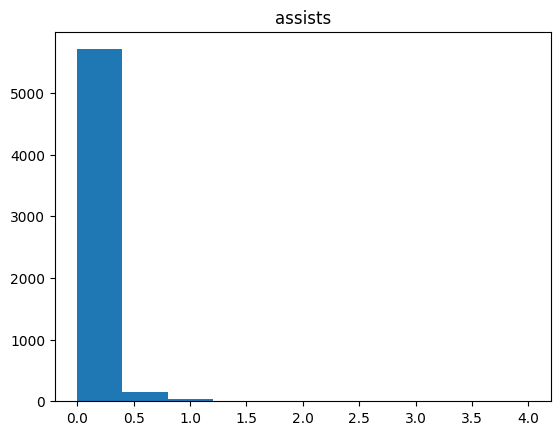

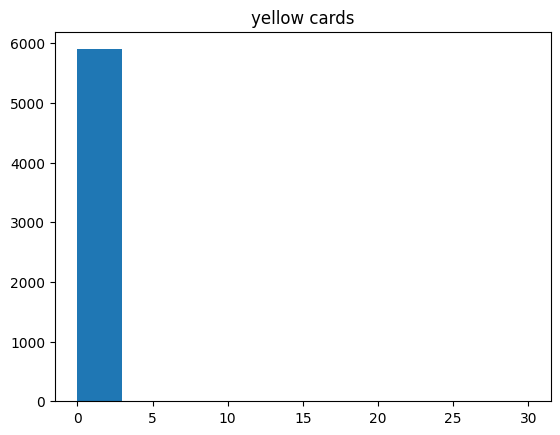

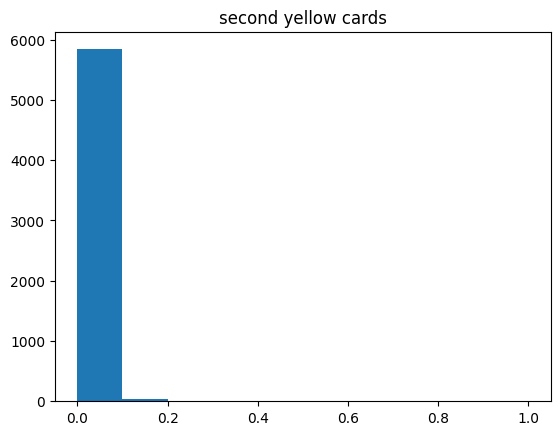

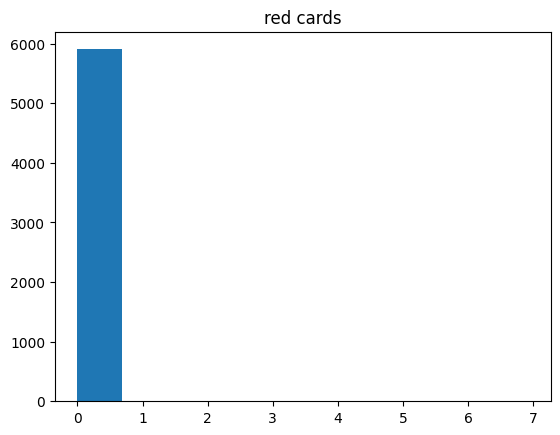

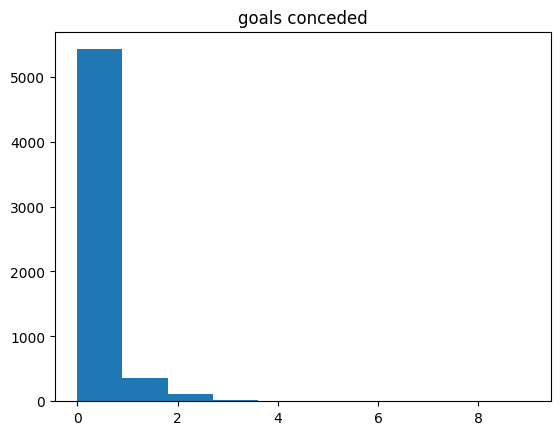

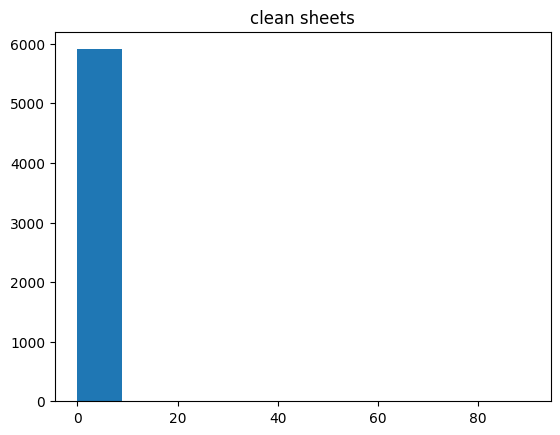

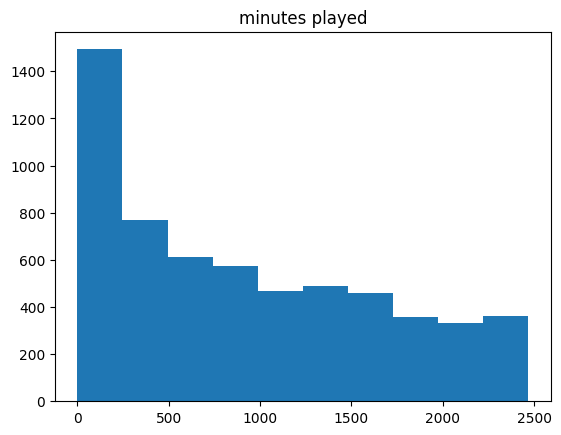

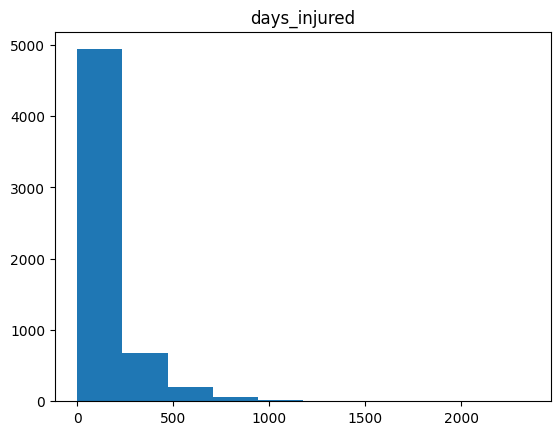

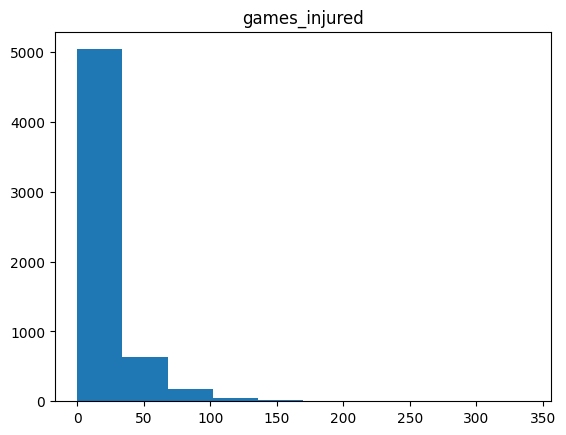

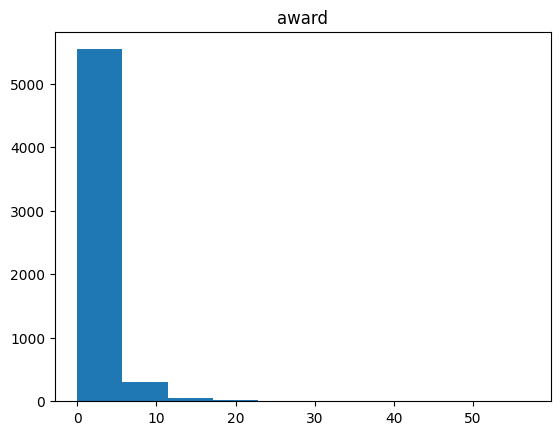

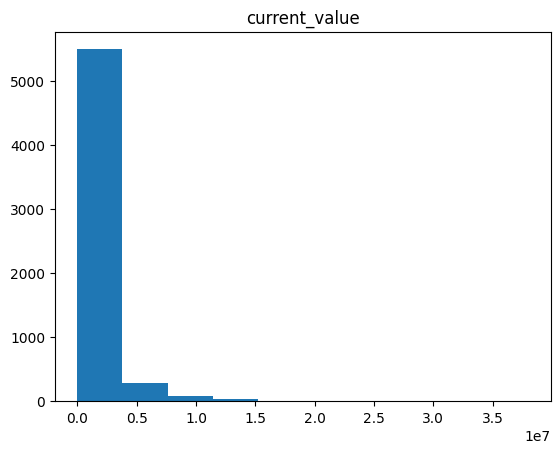

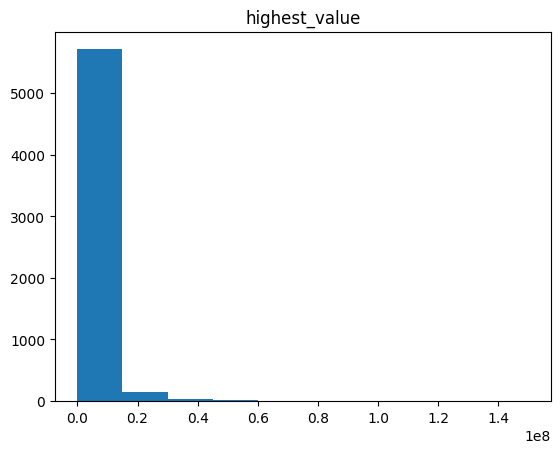

In [26]:
for i in Num_values:
    plt.hist(df[i]);
    plt.title(i)
    plt.show()

In [27]:
# for i in Num_values :
#     plt.boxplot(df[i])
#     plt.title(i)
#     plt.show()

In [28]:
df = df[df['goals'] < 0.5]

In [29]:
df['position'][df['goals'] == 0].value_counts()

position
Goalkeeper                    785
Defender Centre-Back          592
midfield-DefensiveMidfield    320
midfield-CentralMidfield      298
Defender Left-Back            296
Defender Right-Back           296
Attack Centre-Forward         193
midfield-AttackingMidfield    182
Attack-LeftWinger             148
Attack-RightWinger            133
midfield                       60
midfield-LeftMidfield          38
Attack                         37
midfield-RightMidfield         29
Defender                       26
Attack-SecondStriker           15
Name: count, dtype: int64

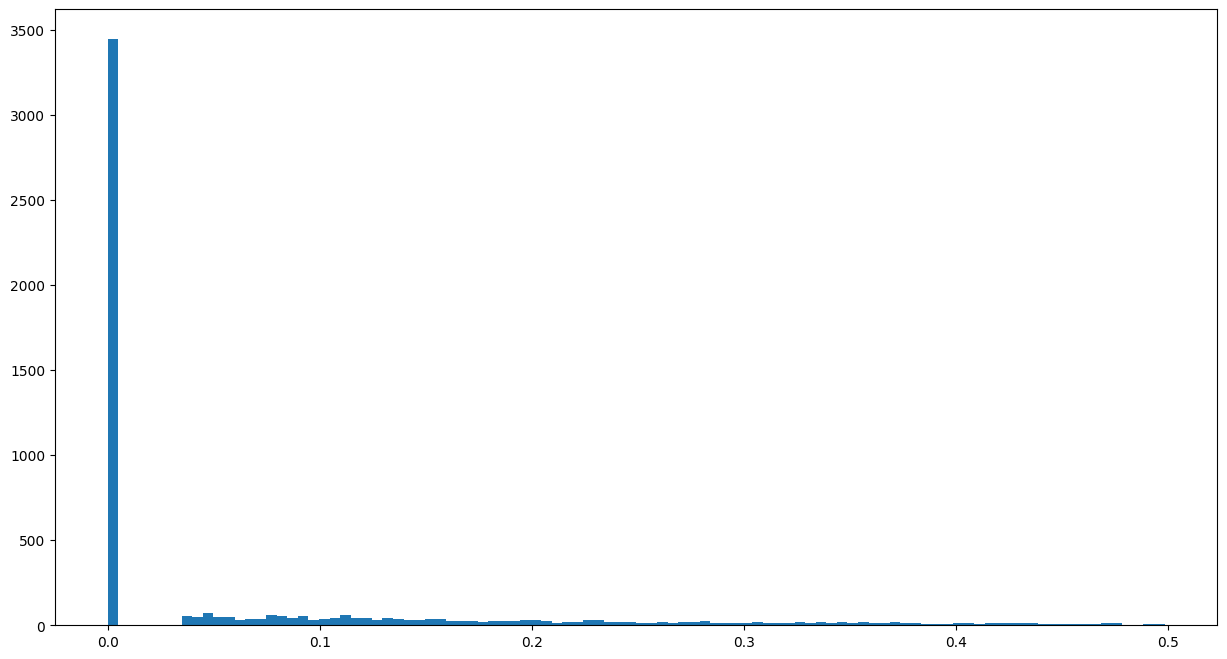

In [30]:
plt.figure(figsize=(15,8))
plt.hist(df[df['goals'] < 0.5]['goals'], bins=100);
plt.show()

In [31]:
df = df[(df['assists']<=0.3)]

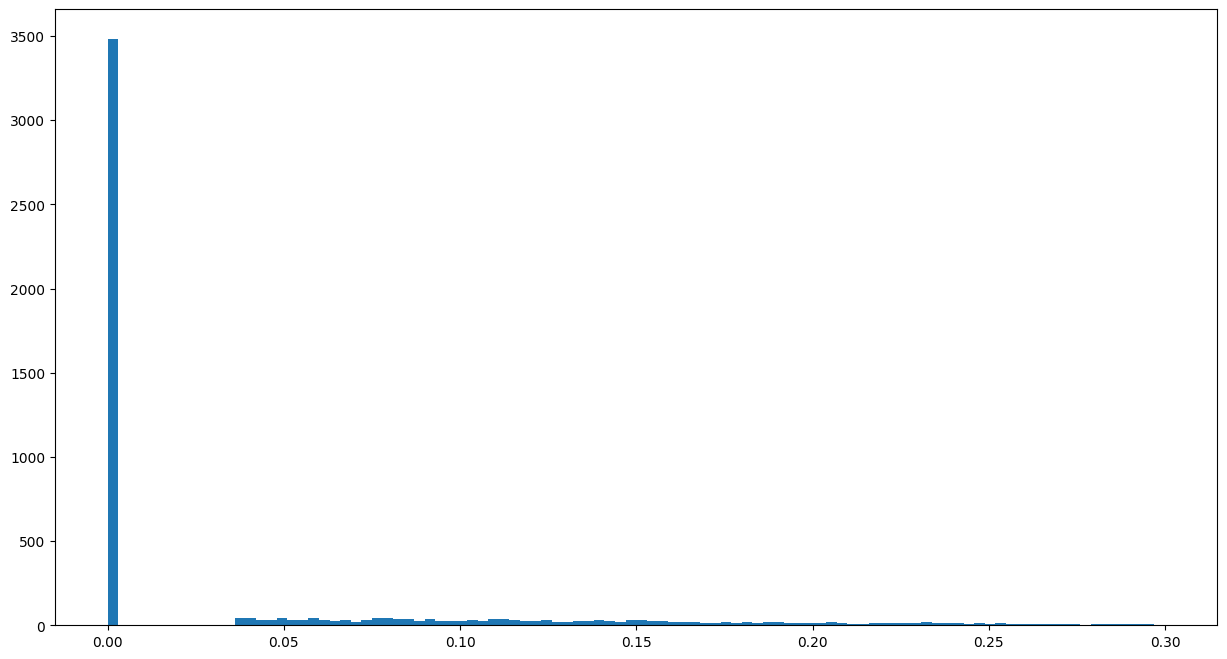

In [32]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['assists']<=0.3)]['assists'], bins=100);
plt.show()

In [33]:
df = df[df['yellow cards'] < 0.45]

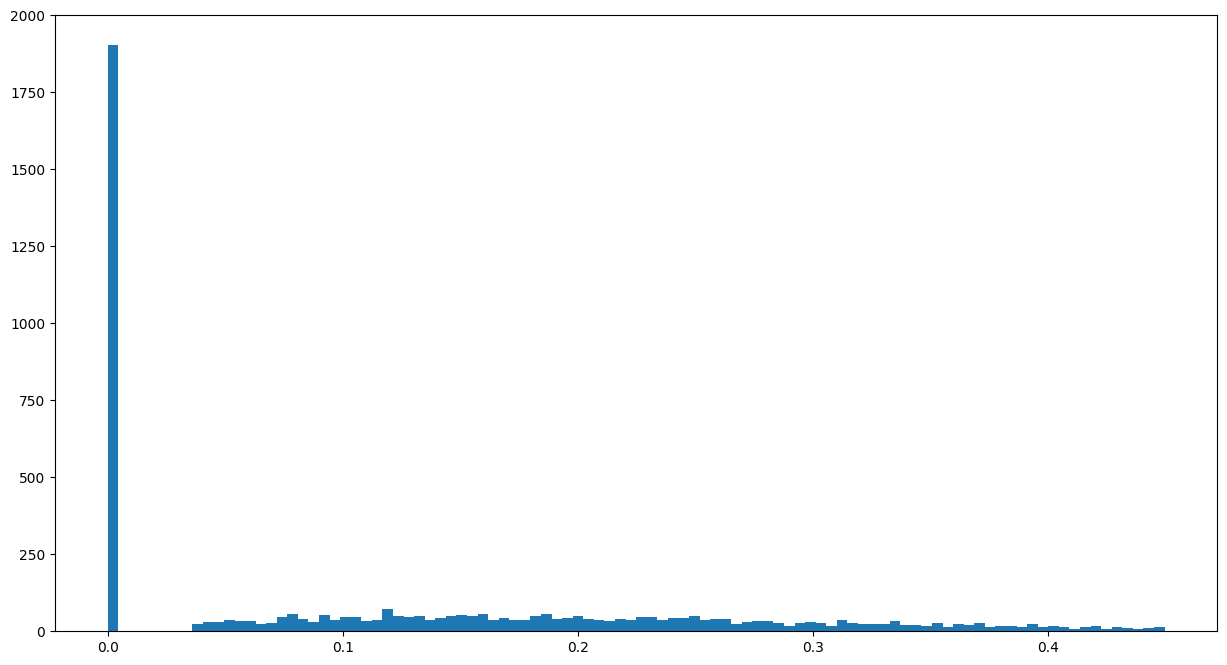

In [34]:
plt.figure(figsize=(15,8))
plt.hist(df[df['yellow cards'] < 0.45]['yellow cards'], bins=100);
plt.show()

In [35]:
df = df[df['second yellow cards'] < 0.04]

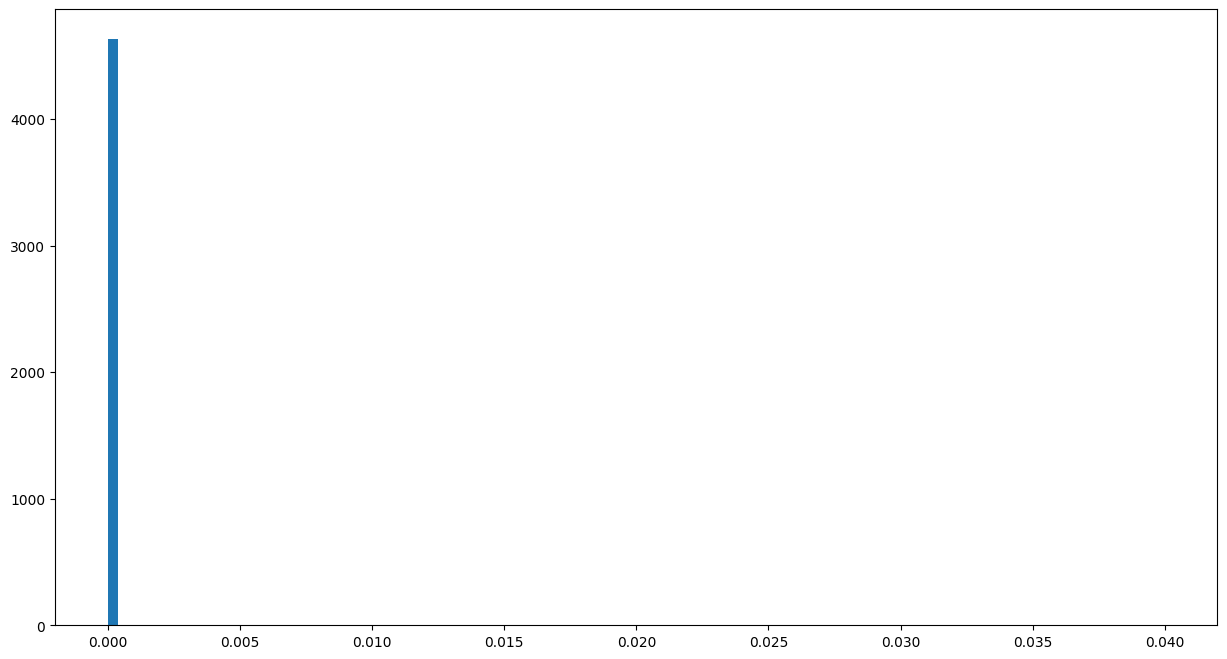

In [36]:
plt.figure(figsize=(15,8))
plt.hist(df[df['second yellow cards'] < 0.04]['second yellow cards'], bins=100);
plt.show()

In [37]:
df = df[df['red cards']<=0.04]

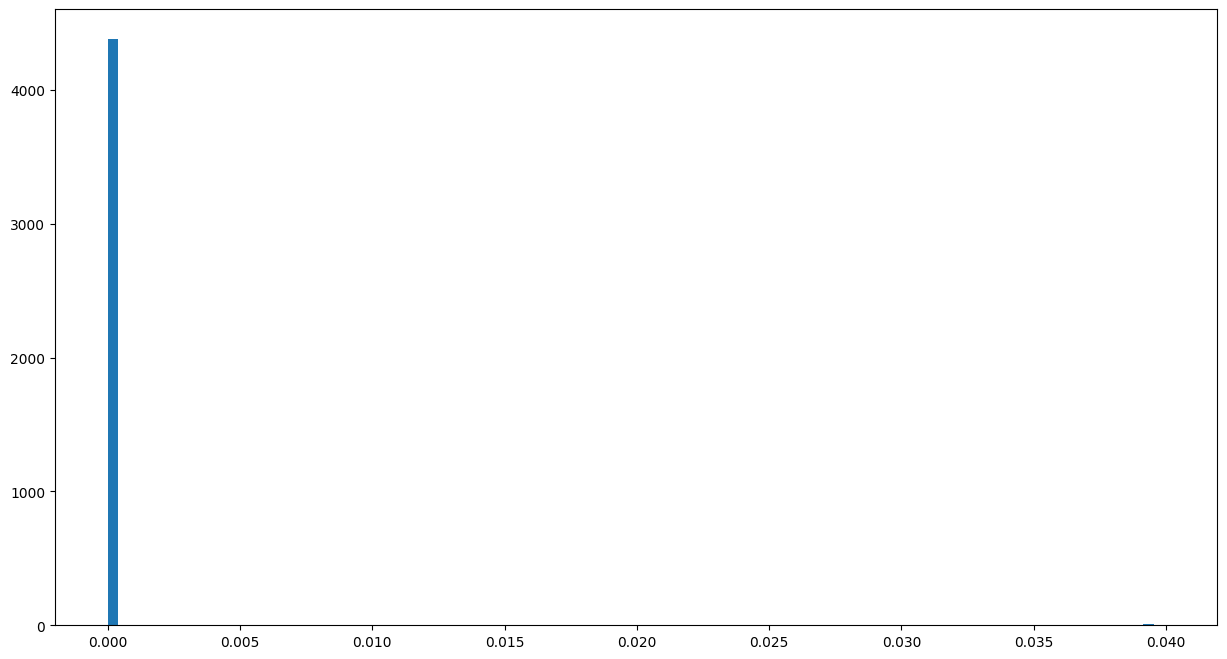

In [38]:
plt.figure(figsize=(15,8))
plt.hist(df[df['red cards']<=0.04]['red cards'], bins=100);
plt.show()

In [39]:
df = df[(df['goals conceded']<=2.25)]

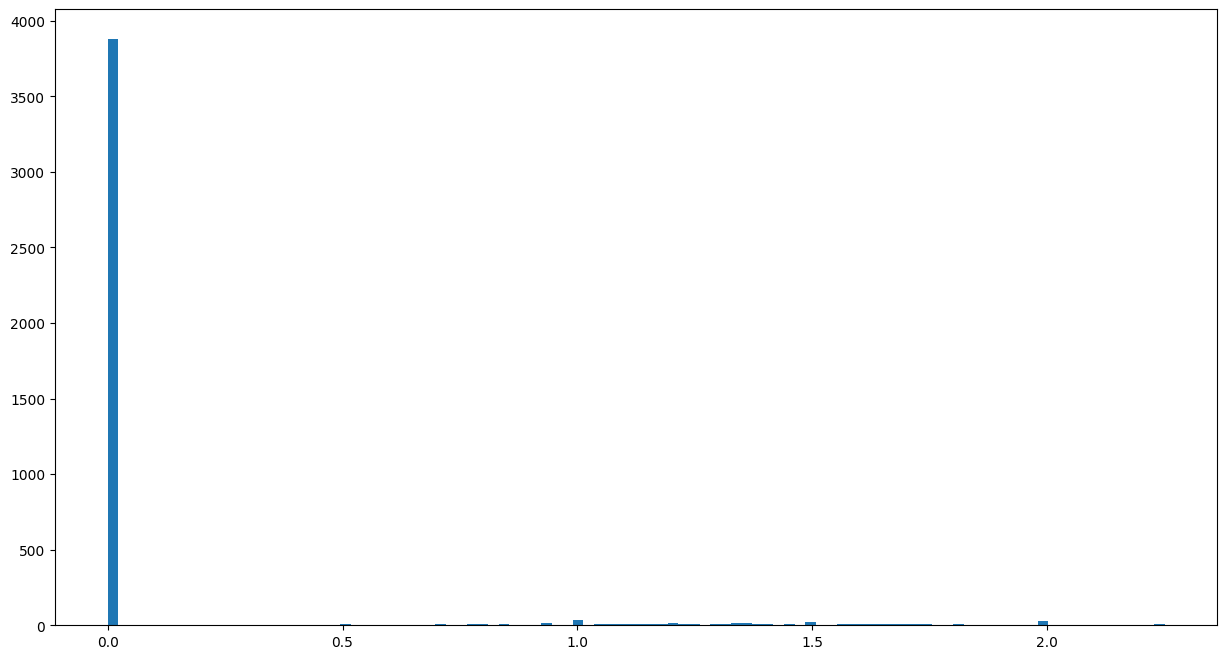

In [40]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['goals conceded']<=2.25)]['goals conceded'], bins=100);
plt.show()

In [41]:
df = df[(df['clean sheets']<= 0.10)]

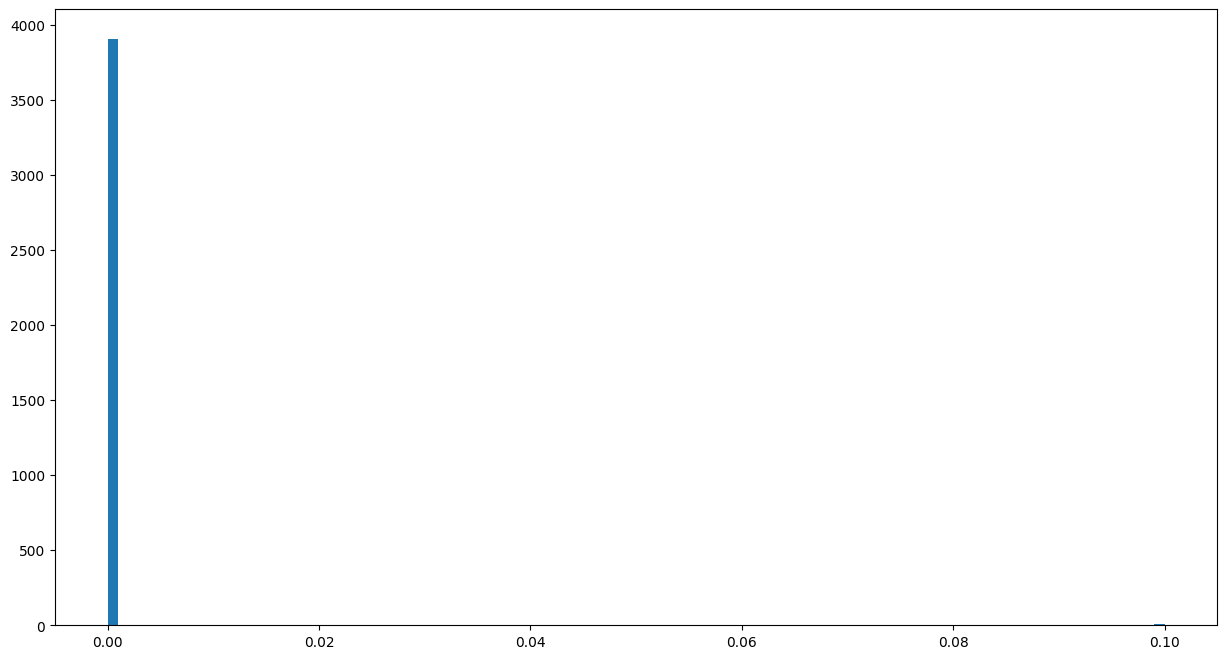

In [42]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['clean sheets']<= 0.10)]['clean sheets'], bins=100);
plt.show()

In [43]:
df = df[(df['games_injured']<= 100)]

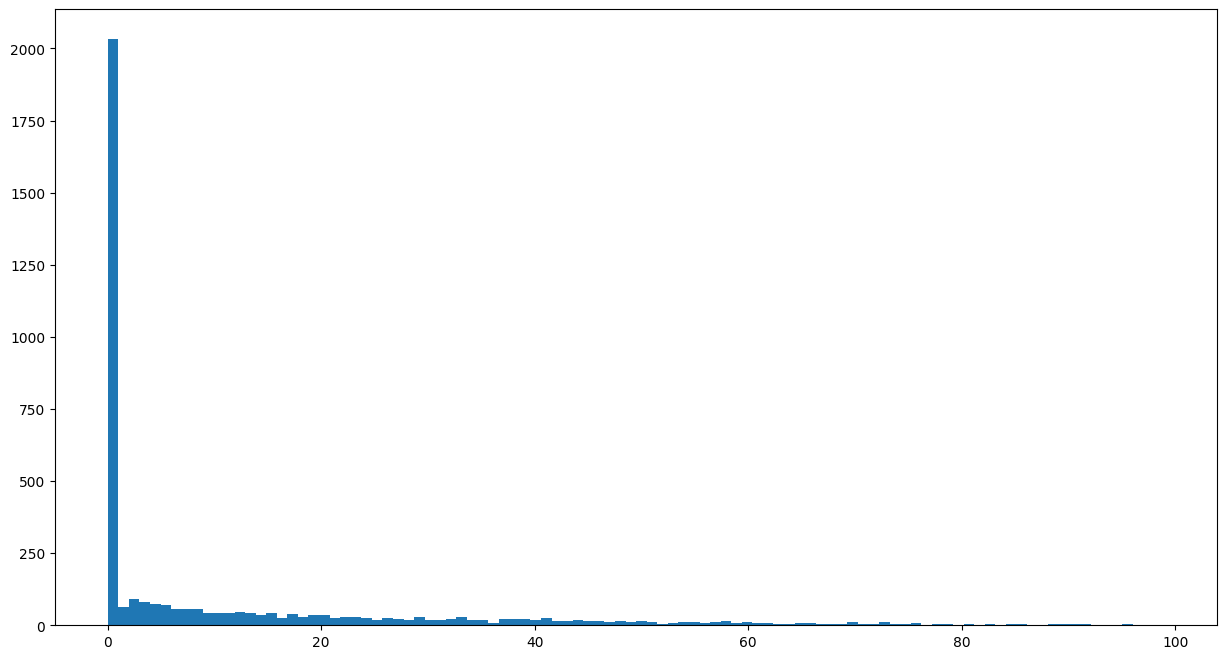

In [44]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['games_injured']<= 100)]['games_injured'], bins=100);
plt.show()

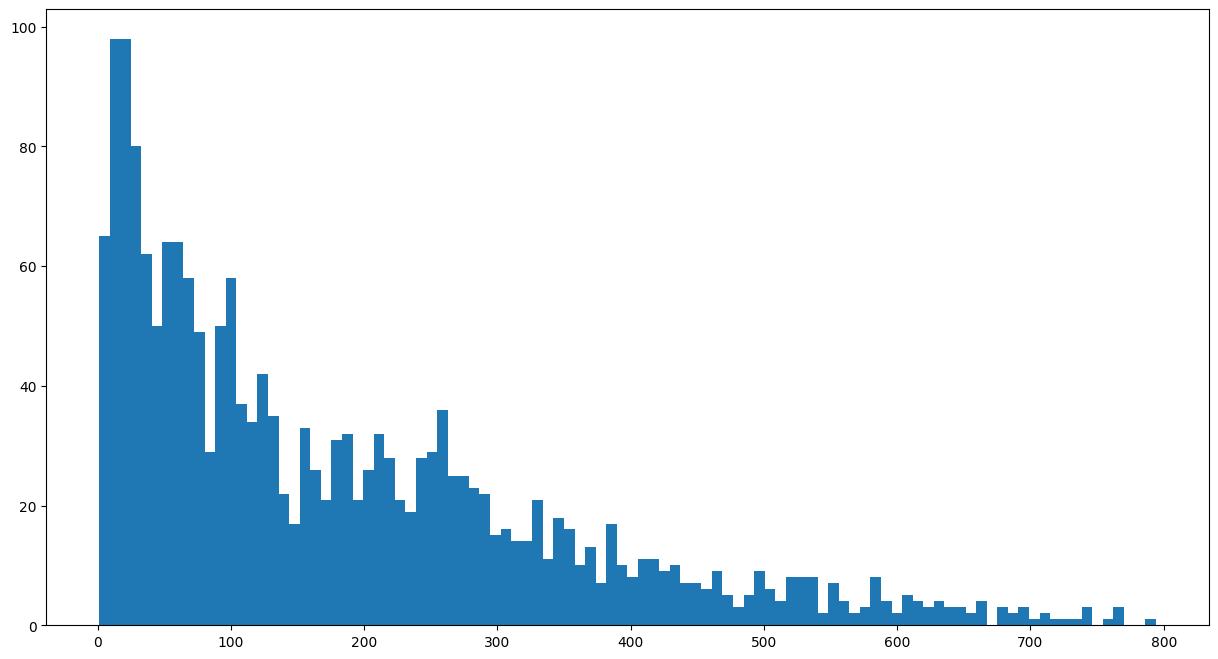

In [45]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['days_injured']<= 800) & (df['days_injured']>=0.01)]['days_injured'], bins=100);
plt.show()

In [46]:
df = df[(df['minutes played']<=10000)]

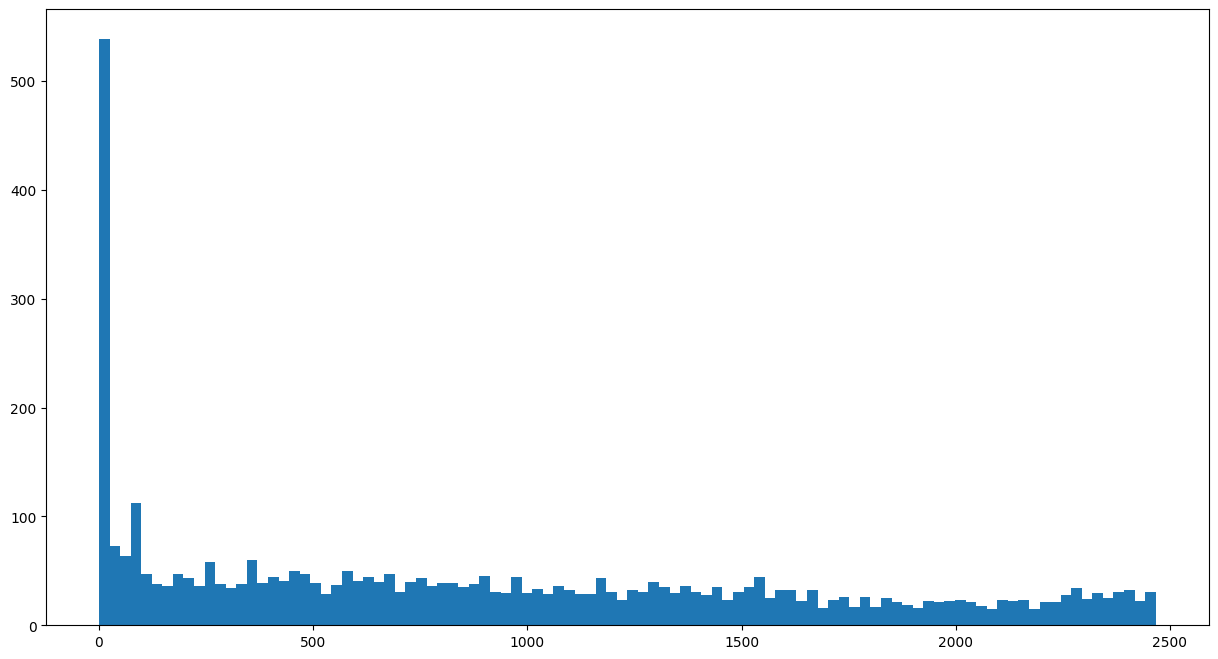

In [47]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['minutes played']<=10000)]['minutes played'], bins=100);
plt.show()

In [48]:
df = df[(df['award']<= 8)]

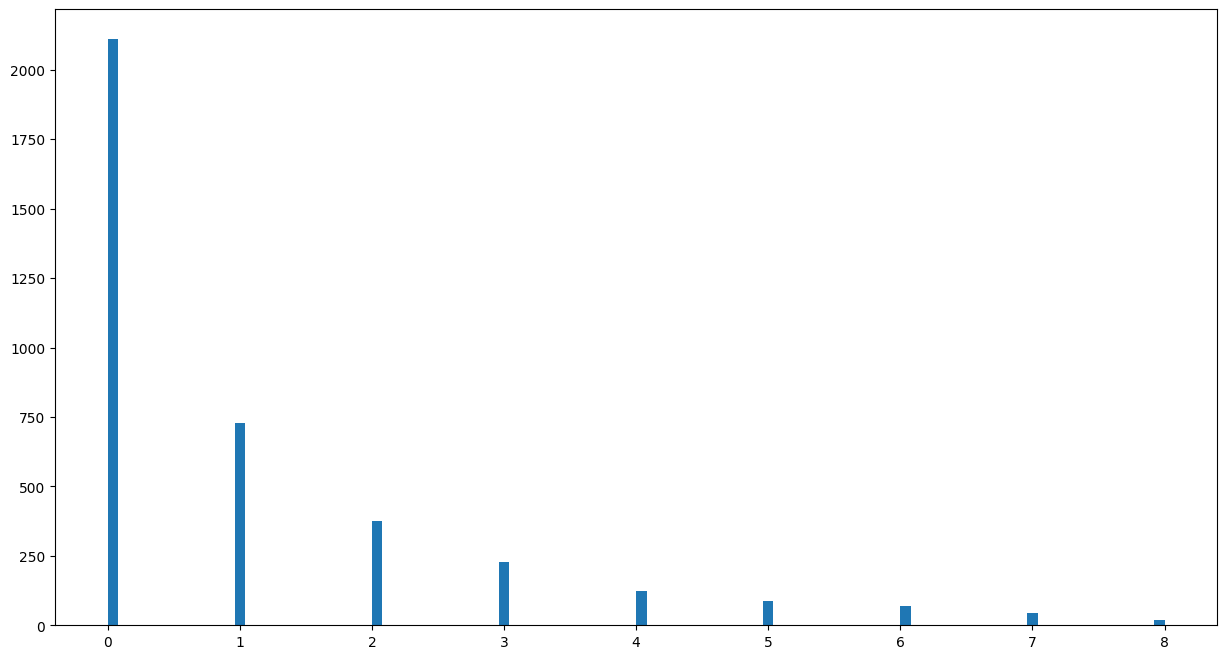

In [49]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['award']<= 8)]['award'], bins=100);
plt.show()

In [50]:
df = df[(df['current_value'] > 1000) & (df['current_value'] < 40000000)]

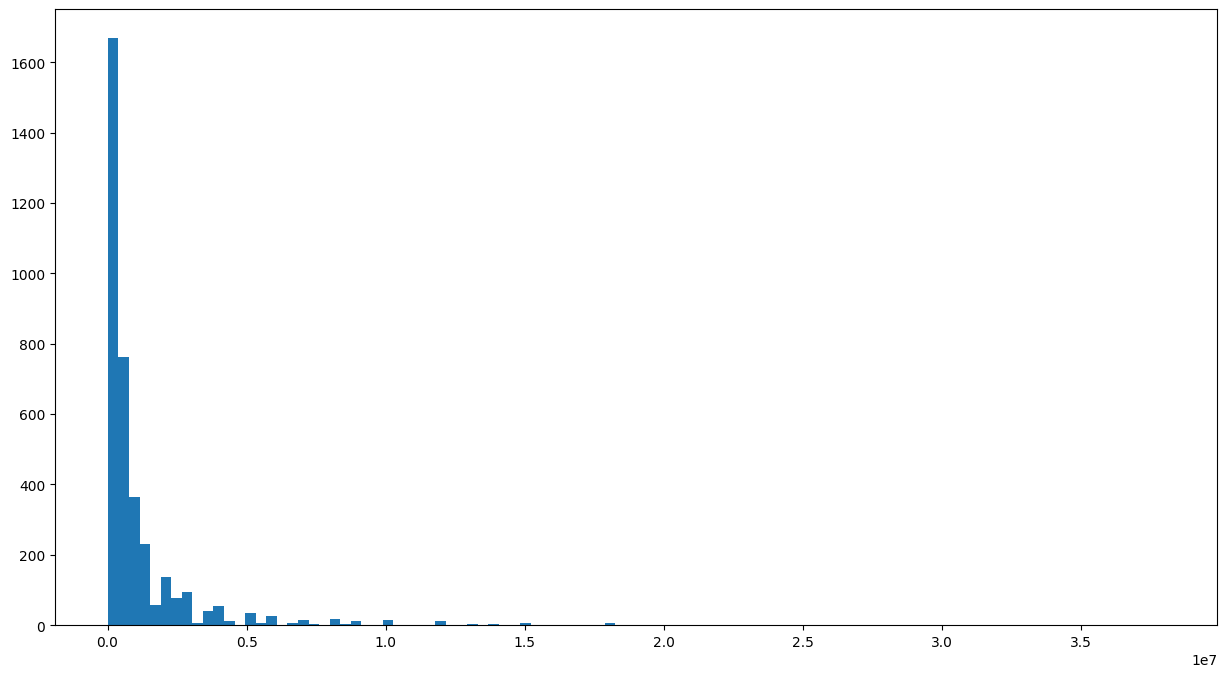

In [51]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['current_value'] > 1000) & (df['current_value'] < 40000000)]['current_value'], bins=100);
plt.show()

In [52]:
df = df[df['age']>= 18]

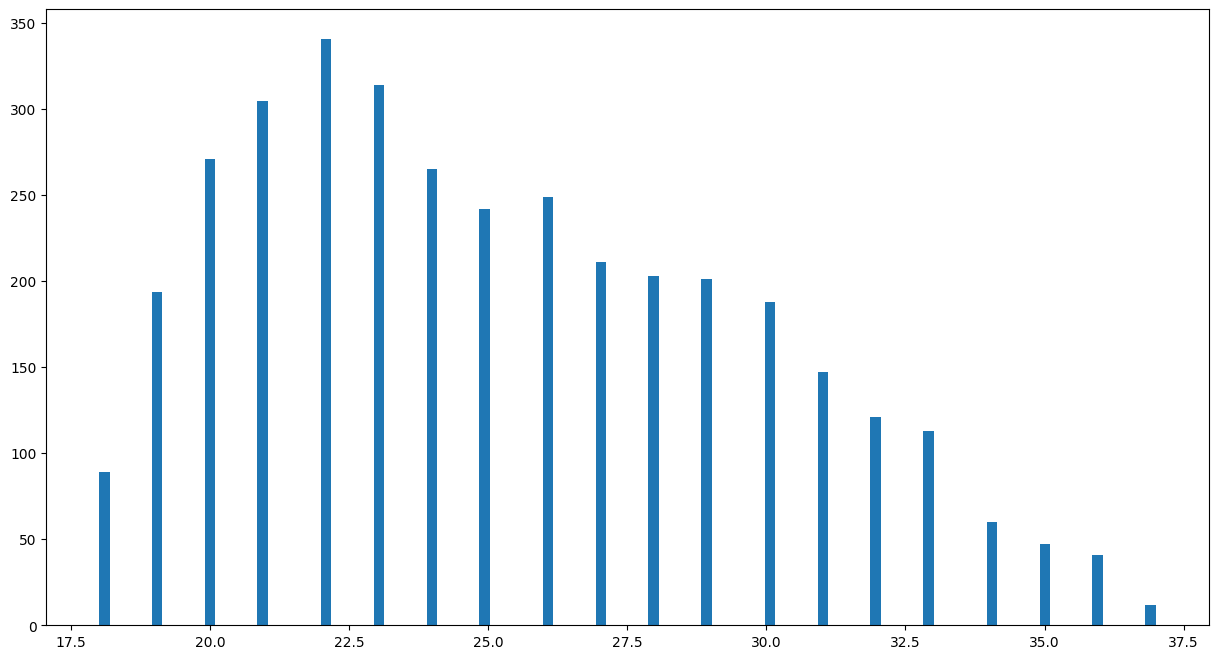

In [53]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['age']<=37) & (df['age']>= 18)]['age'], bins=100);
plt.show()

In [54]:
df = df[df['highest_value'] < 40000000]

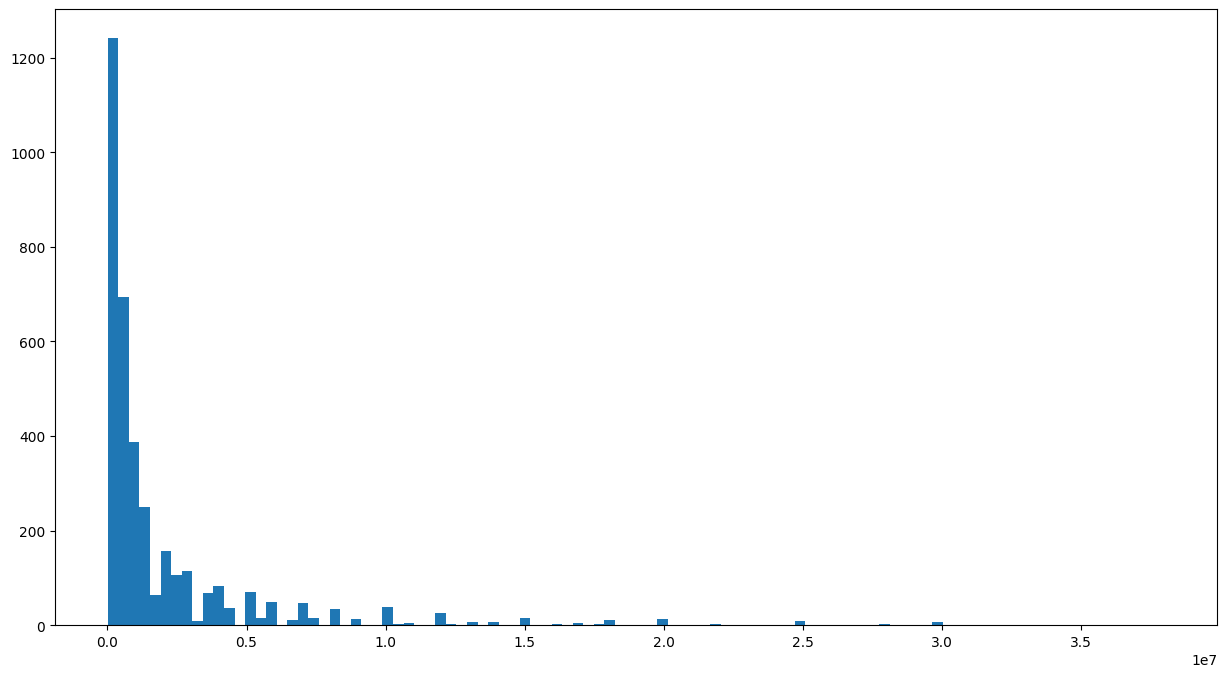

In [55]:
plt.figure(figsize=(15,8))
plt.hist(df[df['highest_value'] < 40000000]['highest_value'], bins=100);
plt.show()

In [56]:
df.to_csv('DF_Classification_Lower.csv')

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.